## Machine Learning Algorithms 
## Python for basic data analysis 





Practice basic Python programing skills using the breast cancer wisconsin dataset.



![breast image](https://drive.google.com/uc?export=view&id=1uyBwqblsTU0Bnb526F9C4jm2Rtf52r13)

| *Fig. 1. Cell nuclei in a breast histopathology image* |
|---|
|Fine Needle Aspiration (FNA) biopsy: https://www.cancer.org/cancer/breast-cancer/screening-tests-and-early-detection/breast-biopsy/fine-needle-aspiration-biopsy-of-the-breast.html|
|H&E stain: https://en.wikipedia.org/wiki/H%26E_stain|


Tasks:

[Task 1](#section1) 

[Task 2](#section2) 

[Task 3](#section3) 

[Task 4](#section4) 

[Task 5](#section5)

## Dataset

    - Number of data samples: 569
    
    - Each data sample has 30 numeric features/attributes. The first 10 features were directly calculated using mean feautues of all nuclei in an image
    
    - Class labels
        : 212 Malignant (0)
        : 357 Benign (1)
        
    https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html#sklearn.datasets.load_breast_cancer

In [ ]:
import sklearn.datasets as ds
import numpy as np

In [ ]:
breast_ds = ds.load_breast_cancer()
print('Data fields in breast_ds: \n', dir(breast_ds))

print('\n Dataset description:\n', breast_ds['DESCR'])

Data fields in breast_ds: 
 ['DESCR', 'data', 'data_module', 'feature_names', 'filename', 'frame', 'target', 'target_names']

 Dataset description:
 .. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the thre

In [ ]:
print(type(breast_ds))

<class 'sklearn.utils._bunch.Bunch'>


In [46]:
# we are going to use the first 10 features in this assignment.
ftrs = breast_ds.data[:, :10]
tgts = breast_ds.target

print('Size of feature vectors: ', ftrs.shape)
print('Size of targets: ', tgts.shape)

#print('Target labels:\n', tgts)

Size of feature vectors:  (569, 10)
Size of targets:  (569,)


In [ ]:
print(type(ftrs))

<class 'numpy.ndarray'>


### Task 1: Explore the dataset.  <a id = "section1"/>
 - **Question 1:** count the number of data samples for benign category.
 - **Question 2:** calculate the the mean feature vectors.
 - **Question 3:** plot the mean feature vectors.

In [45]:
## Question 1
import sklearn.datasets as ds

breast_ds = ds.load_breast_cancer()
# count and print out the number of malignant samples (0)
target = breast_ds.target
num_malignant = np.sum(target == 0)
print(f"number of malignant samples: {num_malignant}")

# count and print out the number of benign samples (1)
num_benign = np.sum(target == 1)
print(f"number of benign samples: {num_benign}")

number of malignant samples: 212
number of benign samples: 357


In [44]:
## Question 2 
# mean of all feature vectors
all_mean = np.mean(breast_ds.data, axis=0)
print("Mean of all feature vectors:")
print(all_mean)

# mean of benign feature vectors
b_mean = np.mean(breast_ds.data[breast_ds.target == 1], axis=0)
print("Mean feature vector for benign")
print(b_mean)

# mean of malignant feature vectors
m_mean = np.mean(breast_ds.data[breast_ds.target == 0], axis=0)
print("Mean feature vector vector for malignant:")
print( m_mean)


Mean of all feature vectors:
[1.41272917e+01 1.92896485e+01 9.19690334e+01 6.54889104e+02
 9.63602812e-02 1.04340984e-01 8.87993158e-02 4.89191459e-02
 1.81161863e-01 6.27976098e-02 4.05172056e-01 1.21685343e+00
 2.86605923e+00 4.03370791e+01 7.04097891e-03 2.54781388e-02
 3.18937163e-02 1.17961371e-02 2.05422988e-02 3.79490387e-03
 1.62691898e+01 2.56772232e+01 1.07261213e+02 8.80583128e+02
 1.32368594e-01 2.54265044e-01 2.72188483e-01 1.14606223e-01
 2.90075571e-01 8.39458172e-02]
Mean feature vector for benign
[1.21465238e+01 1.79147619e+01 7.80754062e+01 4.62790196e+02
 9.24776471e-02 8.00846218e-02 4.60576210e-02 2.57174062e-02
 1.74185994e-01 6.28673950e-02 2.84082353e-01 1.22038011e+00
 2.00032129e+00 2.11351485e+01 7.19590196e-03 2.14382465e-02
 2.59967356e-02 9.85765266e-03 2.05838067e-02 3.63605126e-03
 1.33798011e+01 2.35150700e+01 8.70059384e+01 5.58899440e+02
 1.24959496e-01 1.82672549e-01 1.66237723e-01 7.44443445e-02
 2.70245938e-01 7.94420728e-02]
Mean feature vector ve

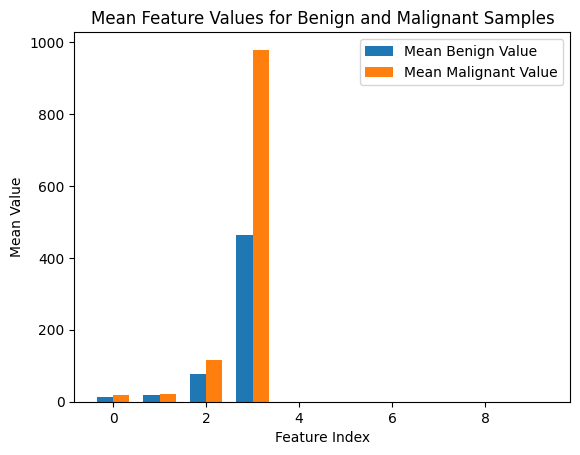

In [39]:
## Question 3 
# show bar chart of the mean feature vectors in benign and malignant seperately using matplotlib
from matplotlib import pyplot as plt

width = 0.35
x = np.arange(10)
mean_benign = np.mean(ftrs[tgts == 1], axis=0)
mean_malignant = np.mean(ftrs[tgts == 0], axis=0)

plt.bar(x - width/2, mean_benign, width, label="Mean Benign Value")
plt.bar(x + width/2, mean_malignant, width, label="Mean Malignant Value")
plt.xlabel('Feature Index')
plt.ylabel('Mean Value')
plt.title('Mean Feature Values for Benign and Malignant Samples')
plt.legend()
plt.show()

### Task 2: Data search. 10 points.  <a id = "section2"/>

**Question:** Let the user input a sample id (0 to 568), and your code will output the feature vector and the corresponding class label of that sample.


In [38]:
# tip: use the input() and print() function
sample_id = int(input("Enter a sample id: "))

if 0 <= sample_id <= 568:
    selected_feature_vector = breast_ds.data[sample_id]
    selected_class_label = breast_ds.target[sample_id]


    print(f"feature vector: {selected_feature_vector}")
    print(f"class label: {selected_class_label}")
else:
    print("Invalid sample ID. Please enter a sample ID between 0 and 568.")



Enter a sample id: 1
feature vector: [2.057e+01 1.777e+01 1.329e+02 1.326e+03 8.474e-02 7.864e-02 8.690e-02
 7.017e-02 1.812e-01 5.667e-02 5.435e-01 7.339e-01 3.398e+00 7.408e+01
 5.225e-03 1.308e-02 1.860e-02 1.340e-02 1.389e-02 3.532e-03 2.499e+01
 2.341e+01 1.588e+02 1.956e+03 1.238e-01 1.866e-01 2.416e-01 1.860e-01
 2.750e-01 8.902e-02]
class label: 0


### Task 3.  Study the 'mean area' feature. <a id = "section3"/>

mean of benign mean area: 462.7901960784313
min of benign mean area: 143.5
max of benign mean area: 992.1


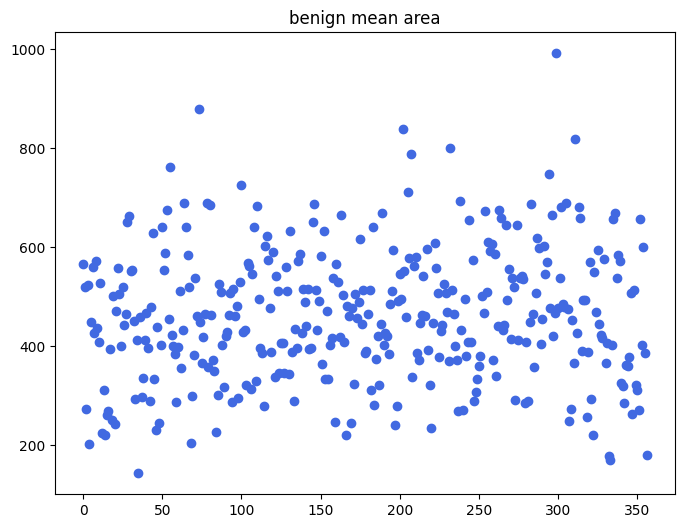

In [34]:
# Question 1: Calculate and print out the mean, min and max values
# of the feature 'mean area (index 3)' for all benign samples.
mean_area_benign = breast_ds.data[breast_ds.target == 1][:, 3]

mean_mean_area_benign = np.mean(mean_area_benign)
min_mean_area_benign = np.min(mean_area_benign)
max_mean_area_benign = np.max(mean_area_benign)

print(f"mean of benign mean area: {mean_mean_area_benign}")
print(f"min of benign mean area: {min_mean_area_benign}")
print(f"max of benign mean area: {max_mean_area_benign}")

# plot the 'mean area (index 3)' features of all benign samples using matplotlib
plt.figure(figsize=(8, 6))
plt.plot(mean_area_benign, 'o', color='royalblue')
plt.title("benign mean area")
plt.show()


mean of malignant mean area: 978.3764150943397
min of malignant mean area: 361.6
max of malignant mean area: 2501.0


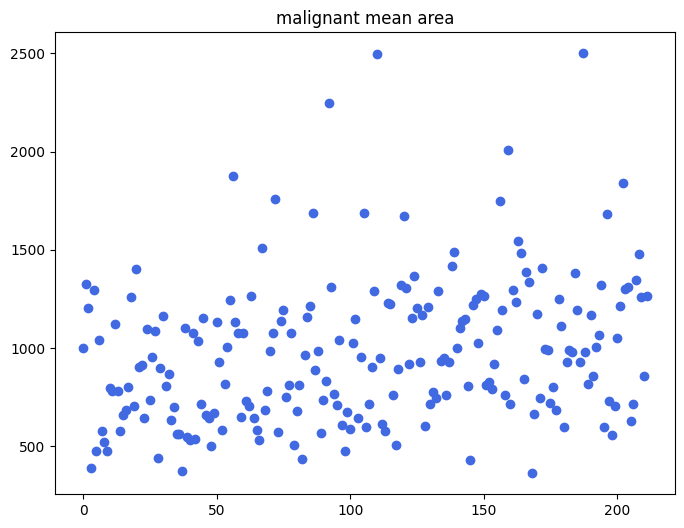

In [32]:
# Question 2: Calculate and print out the mean, min and max values
# of the feature 'mean area (index 3)' for all malignant samples.
mean_area_malignant = breast_ds.data[target == 0][:, 3]

mean_mean_area_malignant = np.mean(mean_area_malignant)
min_mean_area_malignant = np.min(mean_area_malignant)
max_mean_area_malignant = np.max(mean_area_malignant)

print(f"mean of malignant mean area: {mean_mean_area_malignant}")
print(f"min of malignant mean area: {min_mean_area_malignant}")
print(f"max of malignant mean area: {max_mean_area_malignant}")


# plot the 'mean area (index 3)' features of all malignant samples
plt.figure(figsize=(8, 6))
plt.plot(mean_area_malignant, 'o', color='royalblue')
plt.title("malignant mean area")
plt.show()


### Task 4: Count the number of malignant samples that have 'mean area (index 3)' values less than 400.  <a id = "section4"/>



In [48]:
print(np.sum(ftrs[target == 0, 3] < 400))

3


### Task 5. <a id = "section5"/>

**Question 1:** Define a function that calculates and return the Euclidean distance between any two given data samples

Equation for Euclidean distance between any two given data samples:

$$
Euclidean(a, b) = \sqrt{\sum(a-b)^2}
$$

In [26]:
import numpy as np

b_mean = np.mean(ftrs[tgts == 1], axis=0)
m_mean = np.mean(ftrs[tgts == 0], axis=0)

def Euclidean(a, b):
    '''
        inputs:a, b: feature vectors of two patients

        return: d: the distance
    '''

    # write your Euclidean function body here
    return np.sqrt(np.sum((a-b) **2 ))


# test
print('two malignant samples:', Euclidean(ftrs[1], ftrs[2])) # two maliganant samples
print('two benign samples:', Euclidean(ftrs[19], ftrs[20])) # two benign samples
print('between two mean vectors:', Euclidean(b_mean, m_mean)) # betwwen means

two malignant samples: 123.08662898837753
two benign samples: 46.35812850705252
between two mean vectors: 516.9734937120692


**Question 2:** Use the Euclidean function defined in Question 1 to compute the **Euclidean distance** between the first feature vector (ftrs[0]) with all other 568 feature vectors (ftrs[1] to ftrs[568]). Save the results in a List. Draw a bar chart to show the results.

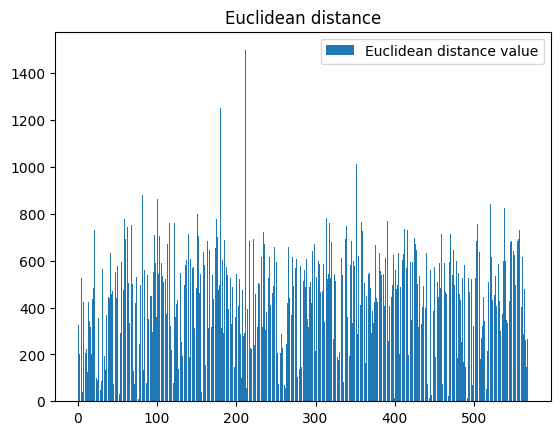

In [25]:
from matplotlib import pyplot as plt
List = []

def Euclidean(a, b):
    return np.sqrt(np.sum(np.square(a - b)))

for i in range(len(ftrs)):
    List.append(Euclidean(ftrs[0], ftrs[i]))

plt.bar(range(len(ftrs)), List, label="Euclidean distance value")
plt.title("Euclidean distance")
plt.legend()
plt.show()